## installing and importing dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
# installing requirements
!pip install -r yolov5/requirements.txt

INFO: pip is looking at multiple versions of ultralytics to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.0/40.2 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.8/40.2 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/40.2 MB 3.4 MB/s eta 0:00:12
   --- ------------------------------------ 3.4/40.2 MB 3.6 MB/s eta 0:00:11
   --- ------------------------------------ 3.9/40.2 MB 3.2 MB/s eta 0:00:12
   ---- ----------------------------------- 5.0/40.2 MB 3.5 MB/s eta 0:00:11
   ----- ---------------------------------- 6.0/40.2 MB 3.6 MB/s eta 0:00:10
   ------- -------------------------------- 7.1/40.2 MB 3.7 MB/s eta 0:00:09
   ------- ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.9.1 requires torch==2.9.1, but you have torch 2.10.0 which is incompatible.


In [4]:
!pip install torch torchvision torchaudio --upgrade

  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.9.1
    Uninstalling torchaudio-2.9.1:
      Successfully uninstalled torchaudio-2.9.1


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
#confirming the dependencies
import torch
import torchaudio
import torchvision

print(f"Torch: {torch.__version__}")
print(f"Audio: {torchaudio.__version__}")
print(f"Vision: {torchvision.__version__}")

# This will return True if they can actually talk to each other
print("Is CUDA available?:", torch.cuda.is_available())

Torch: 2.10.0+cpu
Audio: 2.10.0+cpu
Vision: 0.25.0+cpu
Is CUDA available?: False


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load the model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2026-1-28 Python-3.13.5 torch-2.10.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## making detections with images

In [5]:
img = 'https://c7.alamy.com/comp/HJMGJT/busy-city-road-traffic-in-nottingham-england-uk-HJMGJT.jpg'

In [6]:
results = model(img)
results.print

C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 956x1300 11 cars, 2 trucks
Speed: 3240.1ms pre-process, 1060.3ms inference, 53.4ms NMS per image at shape (1, 3, 480, 640)>

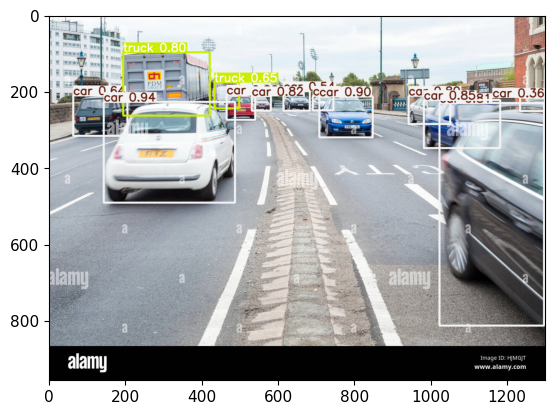

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real time detection

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #make detection
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break    
cap.release()
cv2.destoryAllWindows()

C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\m

AttributeError: module 'cv2' has no attribute 'destoryAllWindows'

## Training a model from scratch

In [8]:
import uuid
import time

In [9]:
IMAGE_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
num_imgs = 20

In [10]:
cap = cv2.VideoCapture(0)
#loop through lables
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)

    #loop through image range
    for img_num in range(num_imgs):
        print(f'Collecting images for {label}, imgage number {img_num}')
        # webcam feed
        ret, frame = cap.read()

        #naming out image path
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        #writes out image to file
        cv2.imwrite(imgname, frame)
        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2seconds delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break    
cap.release()
cv2.destroyAllWindows()

In [11]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

## Loading the model

In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yaml --weights yolov5s.pt --workers 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
fatal: cannot change to 'C:\Users\Ayoola\Desktop\ml': No such file or directory
YOLOv5  2026-1-28 Python-3.13.5 torch-2.10.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, i

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp7/weights/last.pt')

Using cache found in C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2026-1-28 Python-3.13.5 torch-2.10.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


## Testing the results 

In [18]:
img = os.path.join('data', 'images', 'awake.ead1e392-00fd-11f1-be03-e4b31815409a.jpg')

In [19]:
results = model(img)

C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [20]:
results.print

<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x640 1 Awake
Speed: 19.7ms pre-process, 493.9ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)>

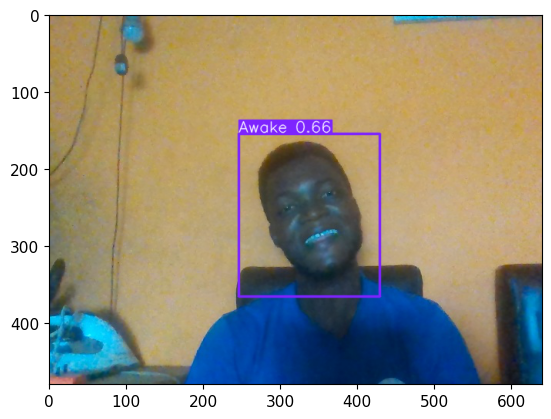

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real time detection of my model

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #make detection
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break    
cap.release()
cv2.destroyAllWindows()

C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Ayoola/.cache\torch\hub\ultralytics_yolov5_master\m